=== Original Data Sample ===
                     Temperature   Humidity
2025-07-09 00:00:00    20.248357  58.584629
2025-07-09 00:01:00    20.247987  59.559221
2025-07-09 00:02:00    20.956807  59.576834
2025-07-09 00:03:00    21.707771  59.017010
2025-07-09 00:04:00    21.138663  59.518201
...                          ...        ...
2025-07-09 01:35:00    18.012503  60.064804
2025-07-09 01:36:00    19.201804  58.935430
2025-07-09 01:37:00    19.497565  60.073273
2025-07-09 01:38:00    34.685437  30.038075
2025-07-09 01:39:00    19.882706  58.857030

[100 rows x 2 columns] 

=== Cleaned Data Sample ===
                     Temperature   Humidity
2025-07-09 00:00:00    20.248357  58.584629
2025-07-09 00:01:00    20.247987  59.559221
2025-07-09 00:02:00    20.956807  59.576834
2025-07-09 00:03:00    21.707771  59.017010
2025-07-09 00:04:00    21.138663  59.518201
...                          ...        ...
2025-07-09 01:35:00    18.012503  60.064804
2025-07-09 01:36:00    19.201804  58.

/var/folders/xn/w4kqb1715fz7h49tp_h7hbmr0000gn/T/ipykernel_35450/843706813.py:9: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_idx = pd.date_range(start='2025-07-09 00:00', periods=n, freq='T')


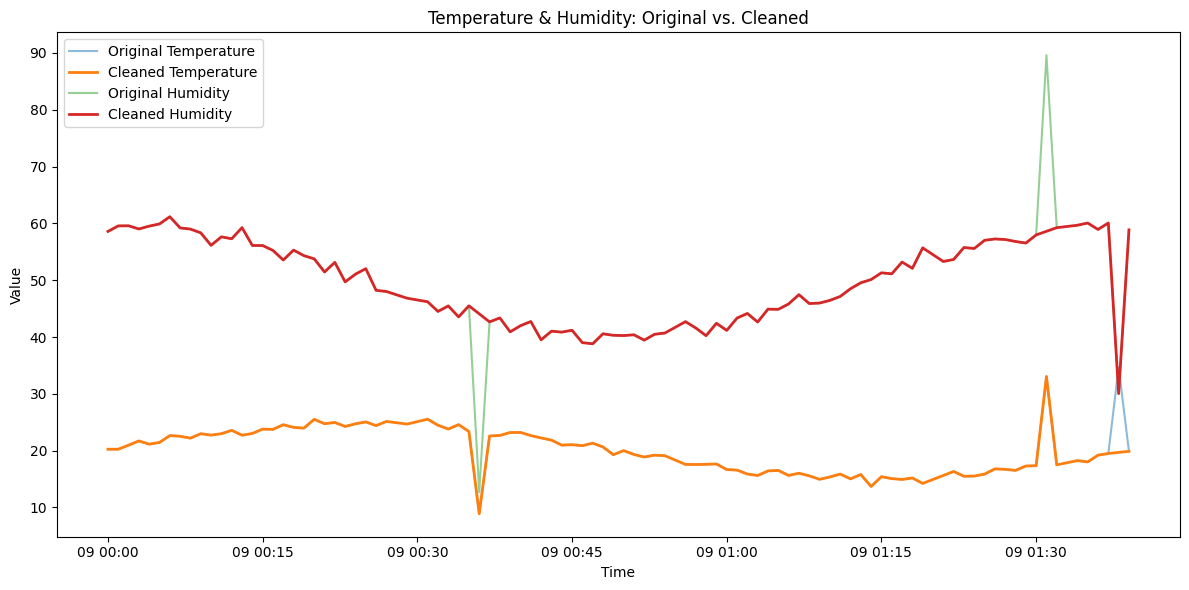

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def generate_data(n=100, seed=42):
    np.random.seed(seed)
    # 시간 인덱스 생성 (예: 1분 간격)
    time_idx = pd.date_range(start='2025-07-09 00:00', periods=n, freq='T')

    
    # 정상 범위 데이터 생성
    temp = 20 + 5 * np.sin(np.linspace(0, 2 * np.pi, n)) + np.random.normal(0, 0.5, n)
    hum  = 50 + 10 * np.cos(np.linspace(0, 2 * np.pi, n)) + np.random.normal(0, 1, n)

    # 일부에 결측치 삽입
    missing_indices = np.random.choice(n, size=5, replace=False)
    temp[missing_indices] = np.nan
    hum[missing_indices]  = np.nan

    # 일부에 이상치 삽입
    outlier_indices = np.random.choice(n, size=3, replace=False)
    temp[outlier_indices] += np.random.choice([15, -15], size=3)
    hum[outlier_indices]  += np.random.choice([30, -30], size=3)

    # DataFrame에 저장
    df = pd.DataFrame({
        'Temperature': temp,
        'Humidity': hum
    }, index=time_idx)

    
    return df

def clean_data(df):
    df_clean = df.copy()

    # 1) 결측치 보간 (선형)
    df_clean.interpolate(method='time', inplace=True)

    # 2) 이상치 탐지 및 처리 (IQR 방식)
    for col in ['Temperature', 'Humidity']:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # 이상치는 NaN으로 표시한 뒤 다시 보간
        mask = (df_clean[col] < lower) | (df_clean[col] > upper)
        df_clean.loc[mask, col] = np.nan
    df_clean.interpolate(method='time', inplace=True)

    return df_clean

def plot_series(original, cleaned):
    plt.figure(figsize=(12, 6))
    plt.plot(original.index, original['Temperature'], label='Original Temperature', alpha=0.5)
    plt.plot(cleaned.index,  cleaned['Temperature'],  label='Cleaned Temperature',   linewidth=2)
    plt.plot(original.index, original['Humidity'],    label='Original Humidity',    alpha=0.5)
    plt.plot(cleaned.index,  cleaned['Humidity'],     label='Cleaned Humidity',     linewidth=2)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Temperature & Humidity: Original vs. Cleaned')
    plt.legend()
    plt.tight_layout()
    plt.show()

def main():
    # 데이터 생성
    df = generate_data(n=100)

    # 전처리 전후 확인용 출력 (옵션)
    print("=== Original Data Sample ===")
    print(df.head(100), '\n')

    # 데이터 클리닝
    df_clean = clean_data(df)

    print("=== Cleaned Data Sample ===")
    print(df_clean.head(100), '\n')

    # 라인 그래프 그리기
    plot_series(df, df_clean)

if __name__ == "__main__":
    main()
